In [95]:
# predict the bike sharing demand (count) on each day of test data

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [307]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [308]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Hypothesis:

1) Hourly trend: more demand on office timing & less on night

2) Daily Trend: more demand on weekdays as compare to weekend/holiday for registered user. Casual may not have any trend will see

3) weather: rainy season will demand less. higher humidity also demand less as compare to others

4) temp: as temp increase demand should be high as washington is cold place

5) pollution: if increases, may use bike unless influenced by awareness

6) wind: if wind is more, less bike demand

7) Time: Total demand should have higher contribution of registered user as compared to casual because registered user base would increase over time

8) Traffic: more traffic, more demand

In [309]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [310]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [311]:
test['casual']=0
test['registered']=0
test['count']=0

In [312]:
df = pd.concat([train, test],  ignore_index=True)

In [313]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0,0,0


Missing Data check

In [314]:
df.apply(lambda x : sum(x.isnull()), axis=0)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

no data is missing

In [315]:
import datetime

In [316]:
min_date = min(train['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date()))
min_date

datetime.date(2011, 1, 1)

In [317]:
max_date= max(train['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date()))
max_date

datetime.date(2012, 12, 19)

In [318]:
min_date_test = min(test['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date()))
min_date_test

datetime.date(2011, 1, 20)

In [319]:
max_date_test = max(test['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date()))
max_date_test

datetime.date(2012, 12, 31)

In [320]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,22.563726,97.436044,119.999770
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,43.210268,141.251913,170.711941
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,3.000000,23.000000,28.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,26.000000,155.000000,192.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [321]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

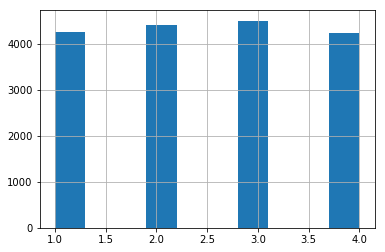

In [322]:
df['season'].hist()

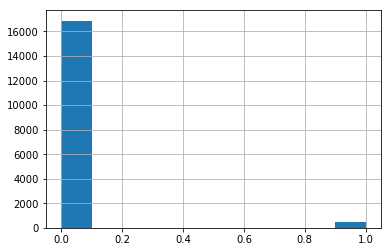

In [323]:
df['holiday'].hist()

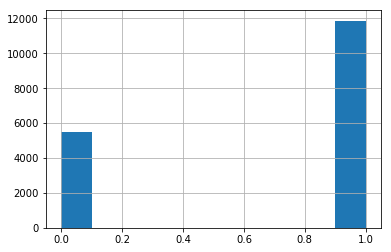

In [324]:
df['workingday'].hist()

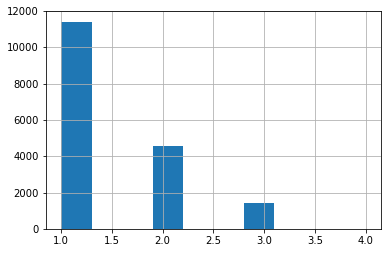

In [325]:
df['weather'].hist()

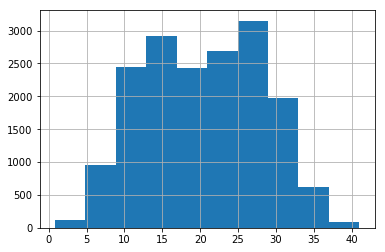

In [326]:
df['temp'].hist()

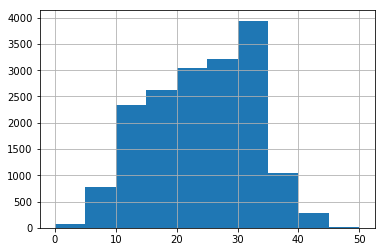

In [327]:
df['atemp'].hist()

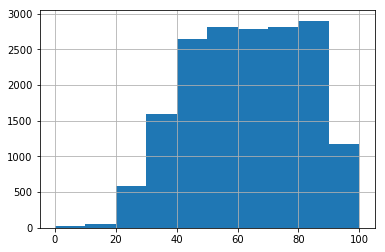

In [328]:
df['humidity'].hist()

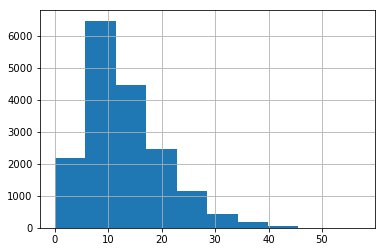

In [329]:
df['windspeed'].hist()

In [330]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [331]:
for col in ['season', 'holiday', 'workingday', 'weather']:
    df[col]=df[col].astype(str)

In [332]:
df['hr']=df['datetime'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').time().hour)

In [333]:
df['dt']=df['datetime'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().day)

In [334]:
df_train = df[df['dt']<20]
df_test = df[df['dt']>19]

In [335]:
df_test.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hr,dt
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,19,31
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0,0,0,20,31
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0,0,0,21,31
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0,0,0,22,31
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0,0,0,23,31


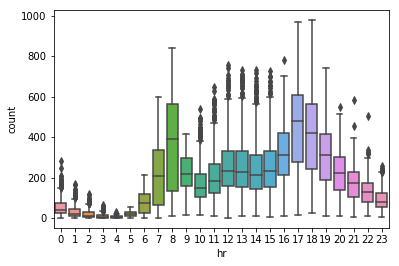

In [336]:
sns.boxplot(x='hr', y='count', data=df_train)

will segregate the demand in 3 cat
low : 0-6 and 20-24
high: 7-9 and 17-19
medium: 10-16

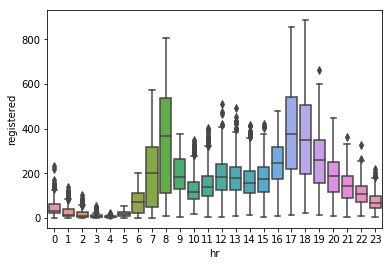

In [337]:
sns.boxplot(x='hr', y='registered', data=df_train)

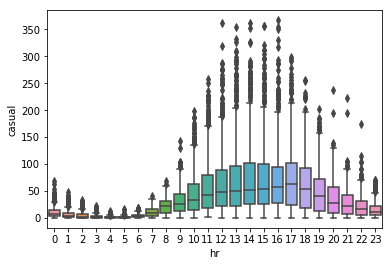

In [338]:
sns.boxplot(x='hr', y='casual', data=df_train)

In [339]:
df_train['count_log']=np.log(df_train['count'])

C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


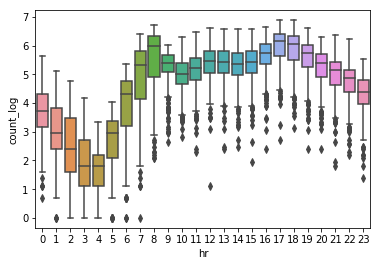

In [340]:
sns.boxplot(x='hr', y='count_log', data=df_train)

In [341]:
df['weekday']= df['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().weekday())

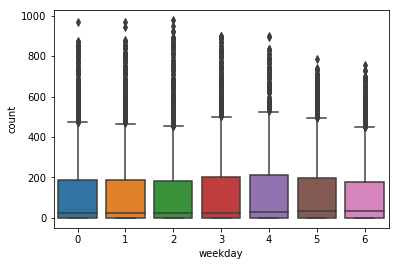

In [342]:
sns.boxplot(x='weekday', y='count', data=df)

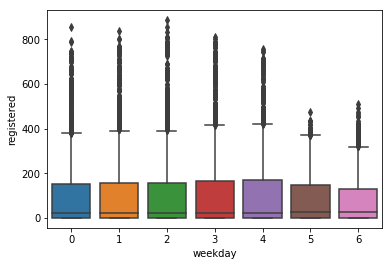

In [343]:
sns.boxplot(x='weekday', y='registered', data=df)

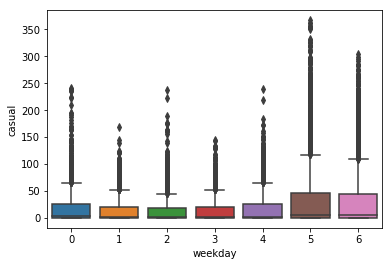

In [344]:
sns.boxplot(x='weekday', y='casual', data=df)

In [345]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hr',
       'dt', 'weekday'],
      dtype='object')

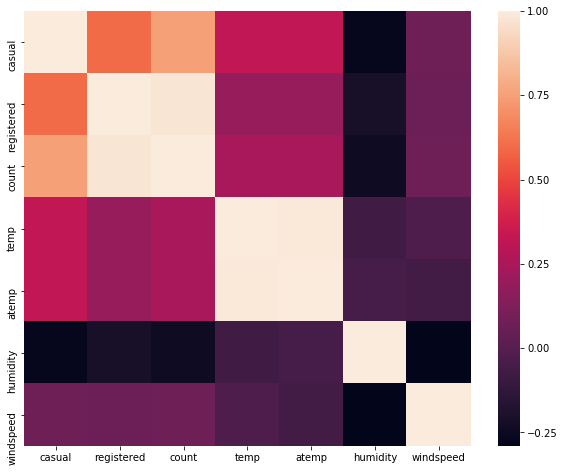

In [346]:
cols= ['casual', 'registered', 'count', 'temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(10,8))
sns.heatmap(df[cols].corr())


In [347]:
df['year']=df['datetime'].apply(lambda x : datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().year)

In [348]:
df_train = df[df['dt']<20]
df_test = df[df['dt']>19]

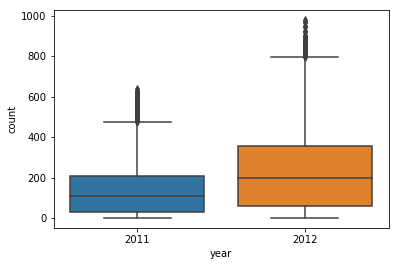

In [349]:
sns.boxplot(x='year', y='count', data = df_train)

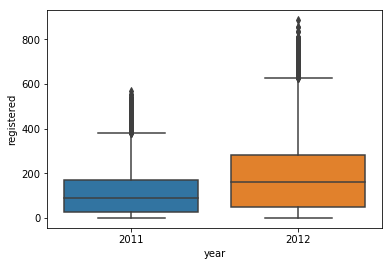

In [350]:
sns.boxplot(x='year', y='registered', data = df_train)

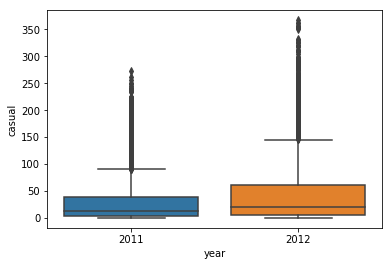

In [351]:
sns.boxplot(x='year', y='casual', data = df_train)

In [352]:
df['quarter']=df['datetime'].apply(lambda x: int((datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').date().month-1)/3))

In [353]:
df['period']= df['year'].map(str) + '_' + df['quarter'].map(str)

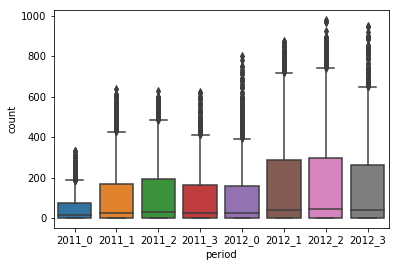

In [354]:
sns.boxplot(x='period', y='count', data=df)

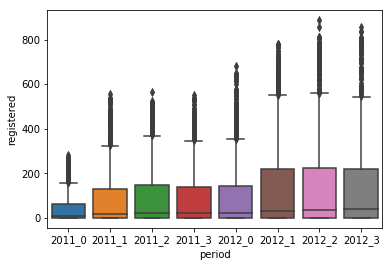

In [355]:
sns.boxplot(x='period', y='registered', data=df)

Feature Engineering

In [356]:
df['hr']=df['hr'].map(int)

In [357]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus

In [358]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
df_train = df[df['dt']<20]
dtree.fit(df_train[['hr']],df_train['registered'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

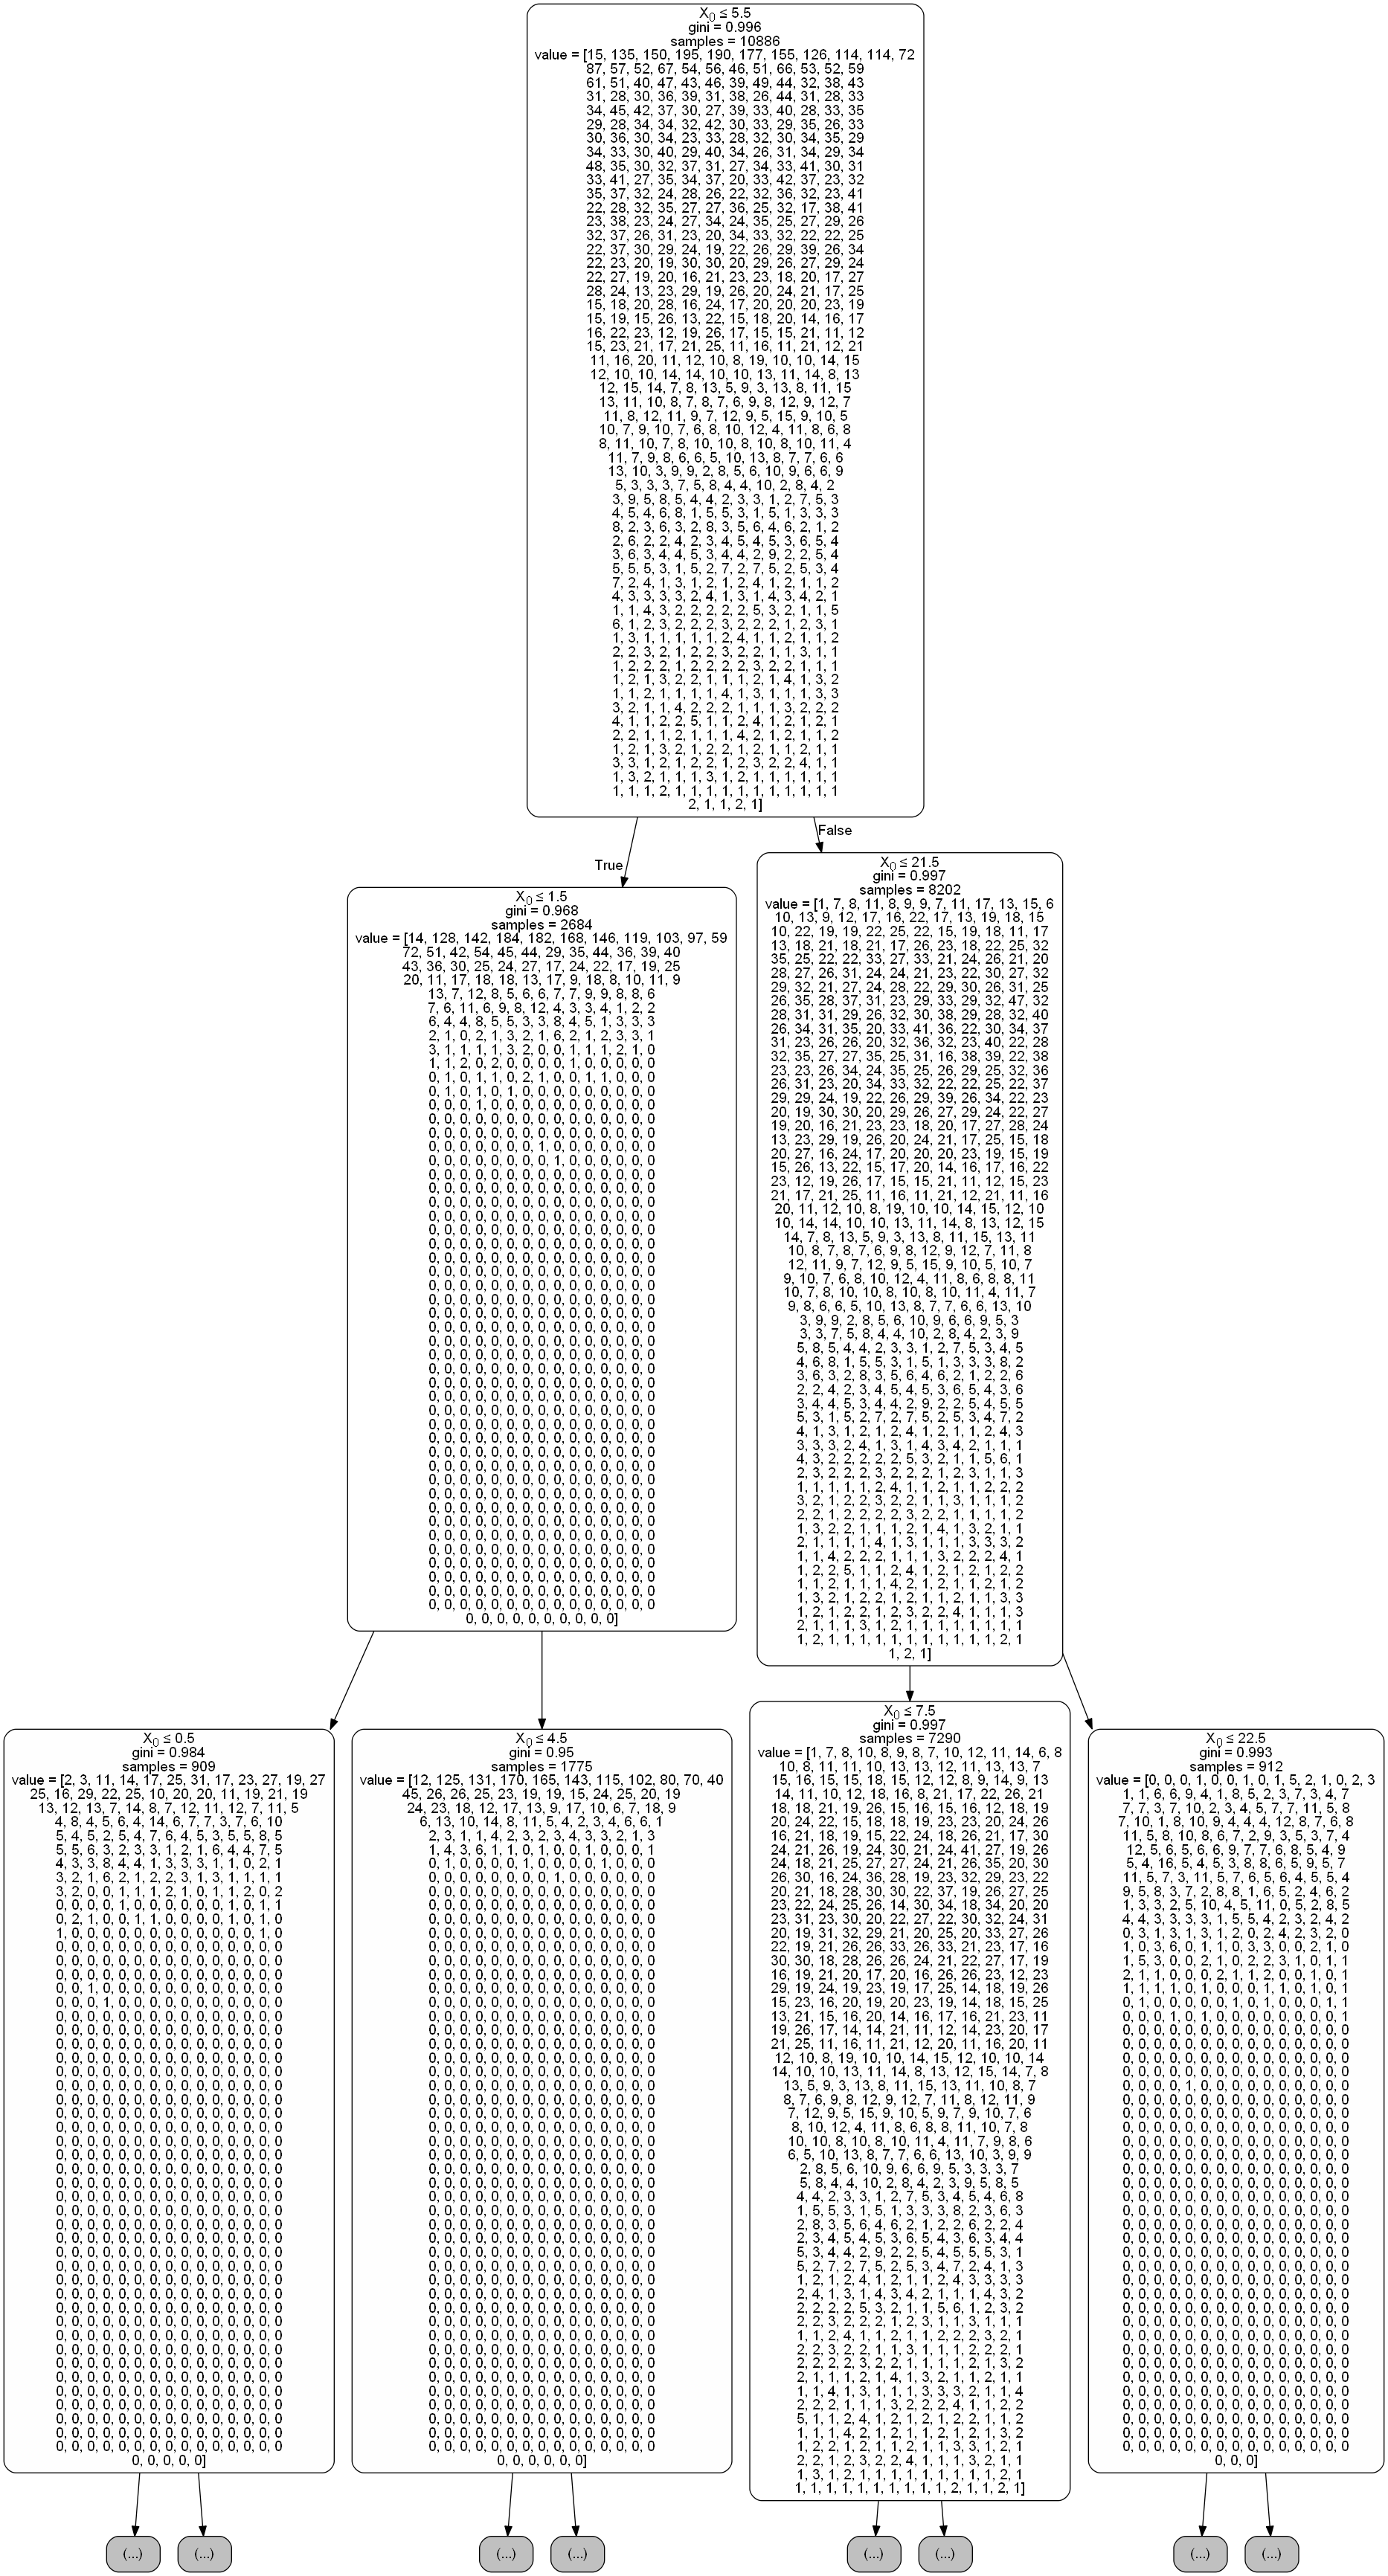

In [359]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, max_depth=2, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

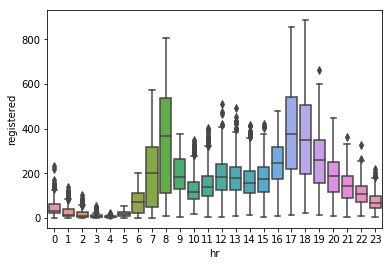

In [360]:
sns.boxplot(x='hr', y='registered', data=df_train)

In [361]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hr',
       'dt', 'weekday', 'year', 'quarter', 'period'],
      dtype='object')

In [362]:
df['hr_bin_rgster'] = ''
df[(df['hr']<7) & (df['hr']>19)]['hr_bin_rgster']='low'
df[(df['hr']>6) & (df['hr']<10)]['hr_bin_rgster']='high'
df[(df['hr']>9) & (df['hr']<17)]['hr_bin_rgster']='avg'
df[(df['hr']>16) & (df['hr']<20)]['hr_bin_rgster']='high'

C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWar

In [363]:
df['day_type']='workingday'
df[(df['holiday']==0) & (df['workingday']==0)]['day_type']='weekend'
df[df['holiday']==1]['day_type']='holiday'

In [364]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hr',
       'dt', 'weekday', 'year', 'quarter', 'period', 'hr_bin_rgster',
       'day_type'],
      dtype='object')

In [365]:
df[['weekday', 'datetime']].head()

,weekday,datetime
0,5,2011-01-01 00:00:00
1,5,2011-01-01 01:00:00
2,5,2011-01-01 02:00:00
3,5,2011-01-01 03:00:00
4,5,2011-01-01 04:00:00


In [366]:
df['weekend']=0
df[(df['weekday']==5) | (df['weekday'] ==6)]['weekend']=1

C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [367]:
from scipy.stats import norm, skew

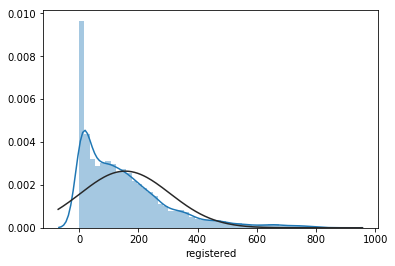

In [368]:
sns.distplot(df_train['registered'], fit=norm)

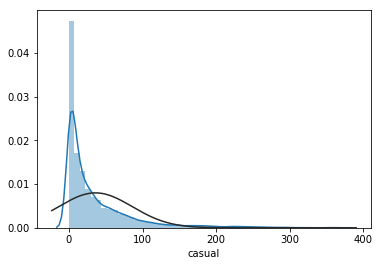

In [369]:
sns.distplot(df_train['casual'], fit=norm)

In [370]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hr',
       'dt', 'weekday', 'year', 'quarter', 'period', 'hr_bin_rgster',
       'day_type', 'weekend'],
      dtype='object')

In [371]:
df['dt']=df['dt'].astype(int)

In [372]:
cols = ['season', 'holiday', 'workingday', 'weather', 'hr',
       'weekday', 'year', 'quarter', 'period', 'hr_bin_rgster',
       'day_type', 'weekend']
for col in cols:
    df[col]=df[col].astype(str)

In [373]:
df_train = df[df['dt']<20]
df_test = df[df['dt']>19]

In [374]:
df_train['registered']=np.log1p(df_train['registered'])
df_train['casual']=np.log1p(df_train['casual'])

C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sourav.raj.IN\AppData\Local\conda\conda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


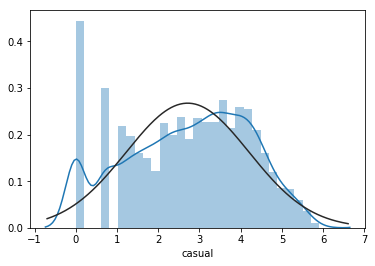

In [375]:
sns.distplot(df_train['casual'], fit=norm)

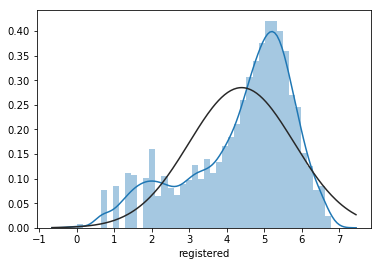

In [376]:
sns.distplot(df_train['registered'], fit=norm)

In [377]:
df=pd.concat([df_train, df_test], ignore_index=True)

In [378]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,dt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540,1.699040,2.753461,119.999770,15.683411
std,7.894801,8.592511,19.292983,8.196795,1.764786,2.397687,170.711941,8.789373
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,0.000000,0.000000,0.000000,8.000000
50%,20.500000,24.240000,63.000000,12.998000,1.386294,3.178054,28.000000,16.000000
75%,27.060000,31.060000,78.000000,16.997900,3.295837,5.049856,192.000000,23.000000
max,41.000000,50.000000,100.000000,56.996900,5.908083,6.787845,977.000000,31.000000


In [379]:
from sklearn.preprocessing import StandardScaler
cols = ['temp' ,'atemp', 'humidity', 'windspeed']
for col in cols:
    sc = StandardScaler()
    df_train[col] = sc.fit_transform(df_train[[col]])
    df_test[col]=sc.transform(df_test[[col]])

In [380]:
df_train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,dt
count,1.088600e+04,1.088600e+04,1.088600e+04,1.088600e+04,10886.000000,10886.000000,10886.000000,10886.000000
mean,3.133020e-16,-2.193114e-16,1.148774e-16,-5.221699e-17,2.712439,4.395774,191.574132,9.992559
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.491055,1.399383,181.144454,5.476608
min,-2.491372e+00,-2.701736e+00,-3.215858e+00,-1.567754e+00,0.000000,0.000000,1.000000,1.000000
25%,-8.074281e-01,-8.248654e-01,-7.735577e-01,-7.101642e-01,1.609438,3.610918,42.000000,5.000000
50%,3.454398e-02,6.902305e-02,5.899992e-03,2.432639e-02,2.890372,4.779123,145.000000,10.000000
75%,7.712696e-01,8.738177e-01,7.853577e-01,5.142603e-01,3.912023,5.407172,284.000000,15.000000
max,2.665707e+00,2.572501e+00,1.980526e+00,5.413599e+00,5.908083,6.787845,977.000000,19.000000


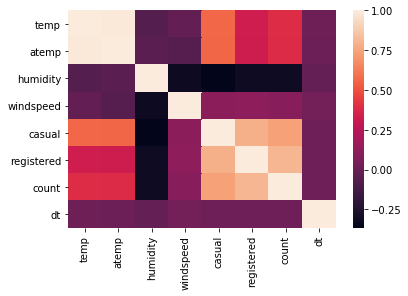

In [381]:
sns.heatmap(df_train.corr())

In [382]:
numeric_cols= ['temp' ,'atemp', 'humidity', 'windspeed']
skewness= df[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness

windspeed    0.574856
temp        -0.006020
atemp       -0.090421
humidity    -0.111278
dtype: float64

In [383]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [384]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hr',
       'dt', 'weekday', 'year', 'quarter', 'period', 'hr_bin_rgster',
       'day_type', 'weekend'],
      dtype='object')

In [385]:
df =df[['datetime','season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'hr', 'dt', 'weekday', 
        'period', 'hr_bin_rgster', 'day_type', 'weekend']]

In [388]:
df.dtypes

datetime          object
season            object
holiday           object
workingday        object
weather           object
temp             float64
humidity         float64
windspeed        float64
casual           float64
registered       float64
hr                object
dt                 int32
weekday           object
period            object
hr_bin_rgster     object
day_type          object
weekend           object
dtype: object

In [389]:
cols=['season', 'holiday', 'workingday', 'weather', 'hr', 'weekday', 
        'period', 'hr_bin_rgster', 'day_type', 'weekend']
df = pd.get_dummies(df, columns=cols)

In [390]:
df.shape

(17379, 61)

In [391]:
df_train = df[df['dt']<20].drop('dt',axis=1)

In [392]:
df_train.shape

(10886, 60)

In [393]:
df_test = df[df['dt']>19].drop('dt',axis=1)

Model Building

In [394]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics

In [395]:
def reg_model(model, train, predictors, outcome):
    kfold= KFold(n_splits=5, random_state=5)
    scoring='r2'
    X=np.array(train[predictors])
    y=np.array(train[outcome])
    cv_score = cross_val_score(model, X, y, scoring = scoring, cv=kfold)
    print('cv_score_mean: ', cv_score.mean(), 'cv_score_std: ', cv_score.std())
    model.fit(X,y)

Linear Regression

In [396]:
model = LinearRegression()
cols = df_train.corr().nlargest(50, 'registered').index
predictors=cols.drop(['registered', 'casual'])
outcome= 'registered'
reg_model(model, df_train, predictors, outcome)

cv_score_mean:  -2.15795523828e+23 cv_score_std:  3.74209695558e+23


In [401]:
model = LinearRegression()
cols = df_train.corr().nlargest(50, 'registered').index
predictors=cols.drop(['registered', 'casual'])
outcome= 'casual'
reg_model(model, df_train, predictors, outcome)

cv_score_mean:  -3.57796118398e+22 cv_score_std:  4.83098307928e+22


In [402]:
model = RandomForestRegressor()
cols = df_train.corr().nlargest(50, 'registered').index
predictors=df_train.columns.drop(['datetime','registered', 'casual'])
outcome= 'casual'
reg_model(model, df_train, predictors, outcome)
y_pred_casual = model.predict(np.array(df_test[predictors]))

cv_score_mean:  0.761090017498 cv_score_std:  0.0636681727871


In [404]:
model = RandomForestRegressor()
cols = df_train.corr().nlargest(50, 'registered').index
predictors=df_train.columns.drop(['datetime','registered', 'casual'])
outcome= 'registered'
reg_model(model, df_train, predictors, outcome)

cv_score_mean:  0.832768514697 cv_score_std:  0.096069760175


In [405]:
imp_feature= pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
predictors=imp_feature.index[0:40]
reg_model(model, df_train, predictors, outcome)
y_pred_reg = model.predict(np.array(df_test[predictors]))

cv_score_mean:  0.840921328265 cv_score_std:  0.085284165338


In [406]:
df_pred=pd.DataFrame()
df_pred['datetime']=df_test['datetime']
df_pred['count']=np.expm1(y_pred_casual) + np.expm1(y_pred_reg)
df_pred.to_csv('RF_reg.csv', index=False)